In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_isopul_tfidf.csv")

In [3]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Isopulegol
0,3,0.0,0.0,0.0,0.0,0.0,0.145484,0.0,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,0.0
1,3,0.0,0.0,0.0,0.0,0.0,0.145484,0.0,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.145484,0.0,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,0.0
3,6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.0
4,7,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0,1,0,0,0,0,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,42965,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.261458,0.0,...,0,0,0,0,0,0,0,0,0,0.0
49996,42968,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.0
49997,42969,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.0
49998,42970,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.0


Splitting dependent and independent variables

In [4]:
X = df_knn.drop(['X..Isopulegol', 'index'], axis = 1)
y = df_knn[['X..Isopulegol']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

<AxesSubplot:ylabel='Count'>

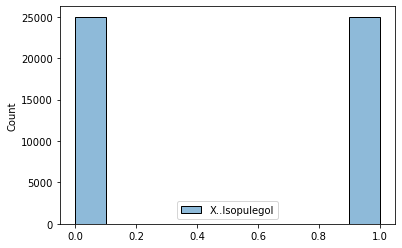

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [10]:
mean_absolute_error(y_val, y_pred_knreg)

0.05666

In [11]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9130283669818553

In [12]:
#val
r2_score(y_val, y_pred_knreg)

0.842989230330023

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([2.49303132e-04, 9.69145800e-04, 2.66906210e-04, 2.51345289e-03,
       1.43277127e-03, 1.04047575e-03, 4.45659723e-04, 3.64698485e-03,
       7.54903559e-04, 1.26639886e-03, 1.00089647e-03, 1.28134705e-03,
       4.59986092e-04, 1.48974364e-03, 9.39406030e-04, 2.65567485e-04,
       4.96595258e-04, 1.79068649e-03, 2.05943417e-04, 1.28403968e-03,
       3.56769050e-03, 1.17513361e-03, 2.43880721e-03, 2.76648017e-03,
       1.41721254e-03, 9.76752015e-04, 1.03979172e-03, 6.61020846e-04,
       4.53519159e-04, 3.39008636e-03, 2.38198020e-03, 1.38986161e-03,
       6.72342319e-04, 2.33446722e-03, 2.39441887e-03, 8.09485760e-04,
       4.22830759e-04, 7.76519363e-03, 1.35939072e-04, 8.39461191e-04,
       4.39379885e-04, 2.49715193e-03, 4.73526431e-04, 2.41120857e-03,
       2.28178218e-04, 1.57508319e-03, 8.43385988e-04, 4.09716884e-04,
       1.92359993e-03, 8.36337364e-04, 1.22379849e-03, 3.95845729e-04,
       2.95488858e-04, 3.11830671e-03, 1.79734869e-03, 1.32512225e-04,
      

In [16]:
selector.threshold_

0.0021321961620469083

In [17]:
mask = selector.get_support()

In [18]:
mask

array([False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False,  True,  True, False, False,  True,  True, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False,

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_3,tfidf_7,tfidf_20,tfidf_22,tfidf_23,tfidf_29,tfidf_30,tfidf_33,tfidf_34,tfidf_37,...,citrus,diesel,flowery,grape,lemon,mango,mint,orange,spicy/herbal,sweet
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.194586,0.15591,0.000000,...,0,0,0,1,0,0,0,0,0,0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.194586,0.15591,0.000000,...,0,0,0,1,0,0,0,0,0,0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.194586,0.15591,0.000000,...,0,0,0,1,0,0,0,0,0,0
3,0.0,0.000000,0.280306,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.000000,0.138272,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.098314,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.261458,0.000000,0.0,0.0,0.0,0.256018,0.000000,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0
49996,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0
49997,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0
49998,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [21]:
selected_X.columns.to_list()

['tfidf_3',
 'tfidf_7',
 'tfidf_20',
 'tfidf_22',
 'tfidf_23',
 'tfidf_29',
 'tfidf_30',
 'tfidf_33',
 'tfidf_34',
 'tfidf_37',
 'tfidf_41',
 'tfidf_43',
 'tfidf_53',
 'tfidf_56',
 'tfidf_58',
 'tfidf_69',
 'tfidf_90',
 'tfidf_93',
 'tfidf_102',
 'tfidf_105',
 'tfidf_111',
 'tfidf_118',
 'tfidf_119',
 'tfidf_121',
 'tfidf_128',
 'tfidf_145',
 'tfidf_148',
 'tfidf_149',
 'tfidf_152',
 'tfidf_154',
 'tfidf_162',
 'tfidf_163',
 'tfidf_165',
 'tfidf_168',
 'tfidf_175',
 'tfidf_180',
 'tfidf_181',
 'tfidf_186',
 'tfidf_188',
 'tfidf_196',
 'tfidf_199',
 'tfidf_200',
 'tfidf_203',
 'tfidf_204',
 'tfidf_205',
 'tfidf_206',
 'tfidf_207',
 'tfidf_239',
 'tfidf_245',
 'tfidf_251',
 'tfidf_253',
 'tfidf_263',
 'tfidf_273',
 'tfidf_278',
 'tfidf_281',
 'tfidf_283',
 'tfidf_285',
 'tfidf_286',
 'tfidf_294',
 'tfidf_297',
 'tfidf_303',
 'tfidf_306',
 'tfidf_309',
 'tfidf_311',
 'tfidf_312',
 'tfidf_314',
 'tfidf_319',
 'tfidf_329',
 'tfidf_331',
 'tfidf_337',
 'tfidf_338',
 'tfidf_342',
 'tfidf_345'

In [22]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_isopul.pkl")
joblib.dump(selector, "selector_knn_tfidf_isopul.pkl")

['selector_knn_tfidf_isopul.pkl']

Train test split (after Feature Selection)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [24]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [25]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [26]:
mean_absolute_error(y_val, y_pred_knreg)

0.045275

In [27]:
mean_squared_error(y_val, y_pred_knreg)

0.031955000000000004

In [28]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.17875961512601218

In [29]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9235889254692644

In [30]:
#val
r2_score(y_val, y_pred_knreg)

0.8721790333539398

Hyperparameter Tuning

In [31]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [32]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [33]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [35]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [36]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.031994184617068135

In [37]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.023839187217974556

In [38]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.1543994404717017

In [39]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9834447671920379

In [40]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.9046425299872348

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [41]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [42]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_isopul.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_isopul.pkl")

['y_test_knreg_tfidf_isopul.pkl']

In [43]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.03208995077537939

In [44]:
r2_score(y_test, y_pred_knreg_test)

0.9036625412771936

In [45]:
mean_squared_error(y_test, y_pred_knreg_test)

0.0240795083094074

In [46]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.15517573363579565

In [47]:
y_test

,X..Isopulegol
26247,1.0
35067,1.0
34590,1.0
16668,0.0
12196,0.0
...,...
49858,0.0
19849,0.0
46899,0.0
28256,1.0


In [48]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

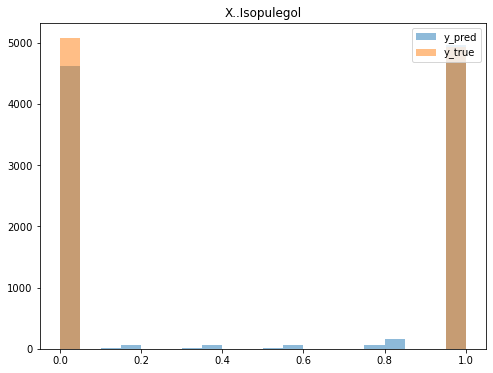

<Figure size 432x288 with 0 Axes>

In [49]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Isopulegol"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_isopul.png')

Pearson R

In [50]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.953
P-value: 0.000


<AxesSubplot:>

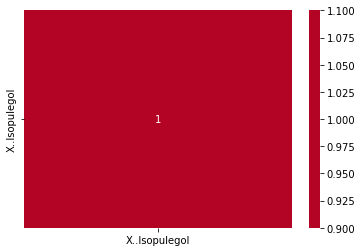

In [51]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)